# Session 2


Mistrali Simone

ID:2021119


In [1]:
# Import libraries

library(GoFKernel)
library(repr) 
library(dplyr)
library(ggplot2)
options(repr.plot.width = 16, repr.plot.height = 10)

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Exercise 1

In [2]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
exptvalue <- function(x,p){
    sum(x*p)/sum(p)
}
weight.var <- function(x,p){
    sum(p*(x-exptvalue(x,p))**2)/sum(p)
}
print(paste0("The expected value of p1 is : ",exptvalue(x,p1)," and the variance is: ",weight.var(x,p1)))
print(paste0("The expected value of p2 is : ",exptvalue(x,p2)," and the variance is: ",weight.var(x,p2)))

[1] "The expected value of p1 is : 15.959 and the variance is: 0.033979"
[1] "The expected value of p2 is : 15.9622 and the variance is: 0.02816716"


## Exercise 2

[1] "The mean waiting time is: 34.4133853847072"
[1] "The probability that a person will t<10 min is 28.3468689426211"
[1] "From simulation we have an expected value: 34.4133853847072 and the theoretical value is:30"
[1] "The probability that a person will wait more than one hour is: 13.5335283236613%"


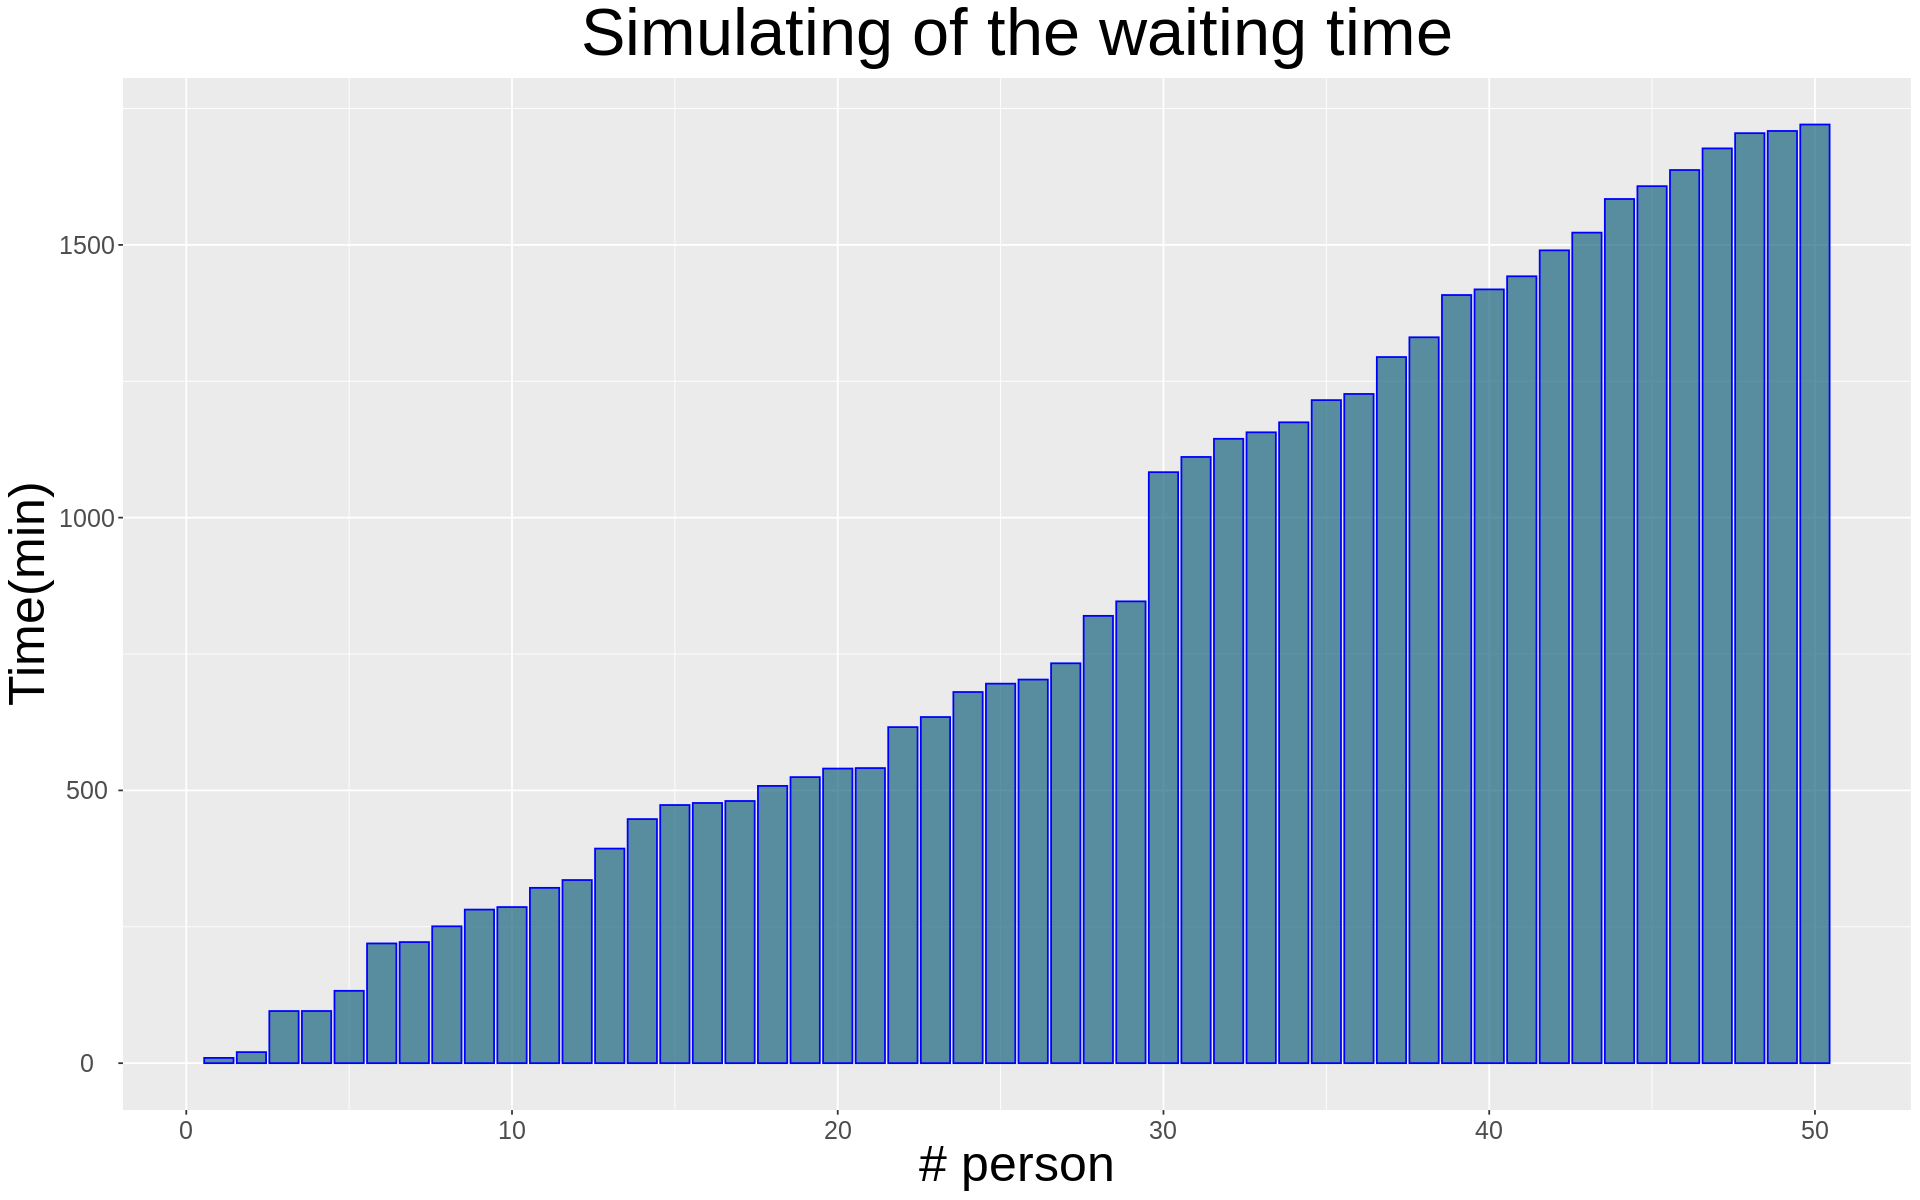

In [3]:
x = 1:50
lambda <- 1/30




ap <- rexp(x, lambda)

print(paste0("The mean waiting time is: ",mean(ap)))

df = tibble(number_of_person=x,minutes=cumsum(ap))
ggplot(df, aes(x=number_of_person, y=minutes)) + 
    ggtitle("Simulating of the waiting time") +
    geom_bar(stat="identity", color="blue", fill=rgb(0.1,0.4,0.5,0.7)) + 
    labs(x="# person", y="Time(min)") +
    theme(axis.text.x = element_text(vjust = 0.5, hjust=0.5, size=15),
           axis.text.y = element_text(vjust = 0.5, hjust=0.5, size=15),
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30)
         )



print(paste0("The probability that a person will t<10 min is ",pexp(10,lambda)*100))


# Expected value simulated 
sim_exp <- mean(ap) 
# Theorical expected value
th_exp <- 1/lambda 
# Theorical variance

print(paste0("From simulation we have an expected value: ",sim_exp," and the theoretical value is:",th_exp))

print(paste0("The probability that a person will wait more than one hour is: ",(1-pexp(60,lambda))*100,"%"))

## Exercise 3

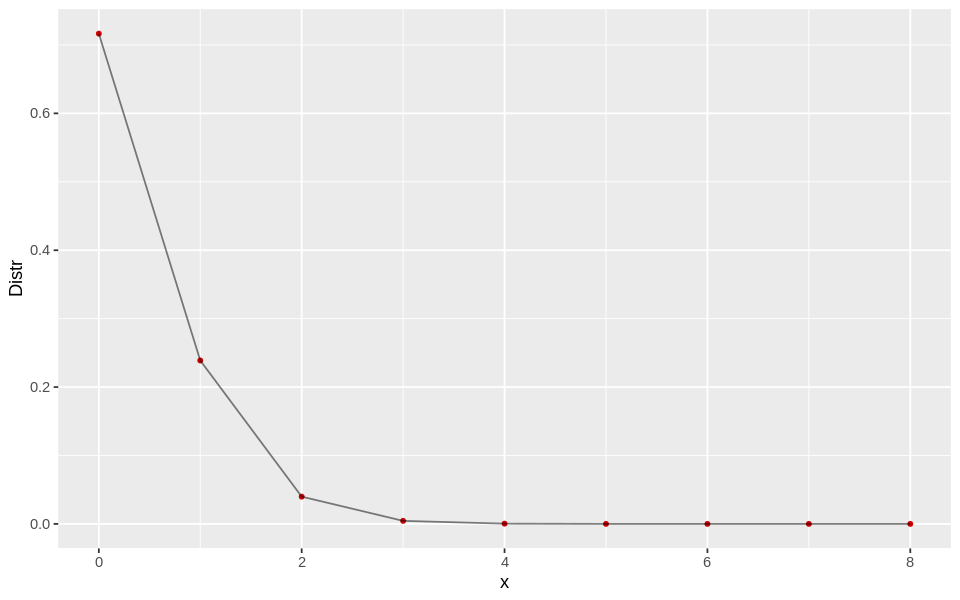

In [4]:
options(repr.plot.width = 8, repr.plot.height = 5)
lambda <- 1/3
x      <- 0:8
df     <- tibble(Distr=dpois(x,lambda),x=x)
ggplot(df,aes(x=x,y=Distr)) +geom_point(colour="#CC0000",size=1)+geom_line(alpha=.5)

[1] "The probability that there is at least one error on a specific page is:4.46249192349476%"


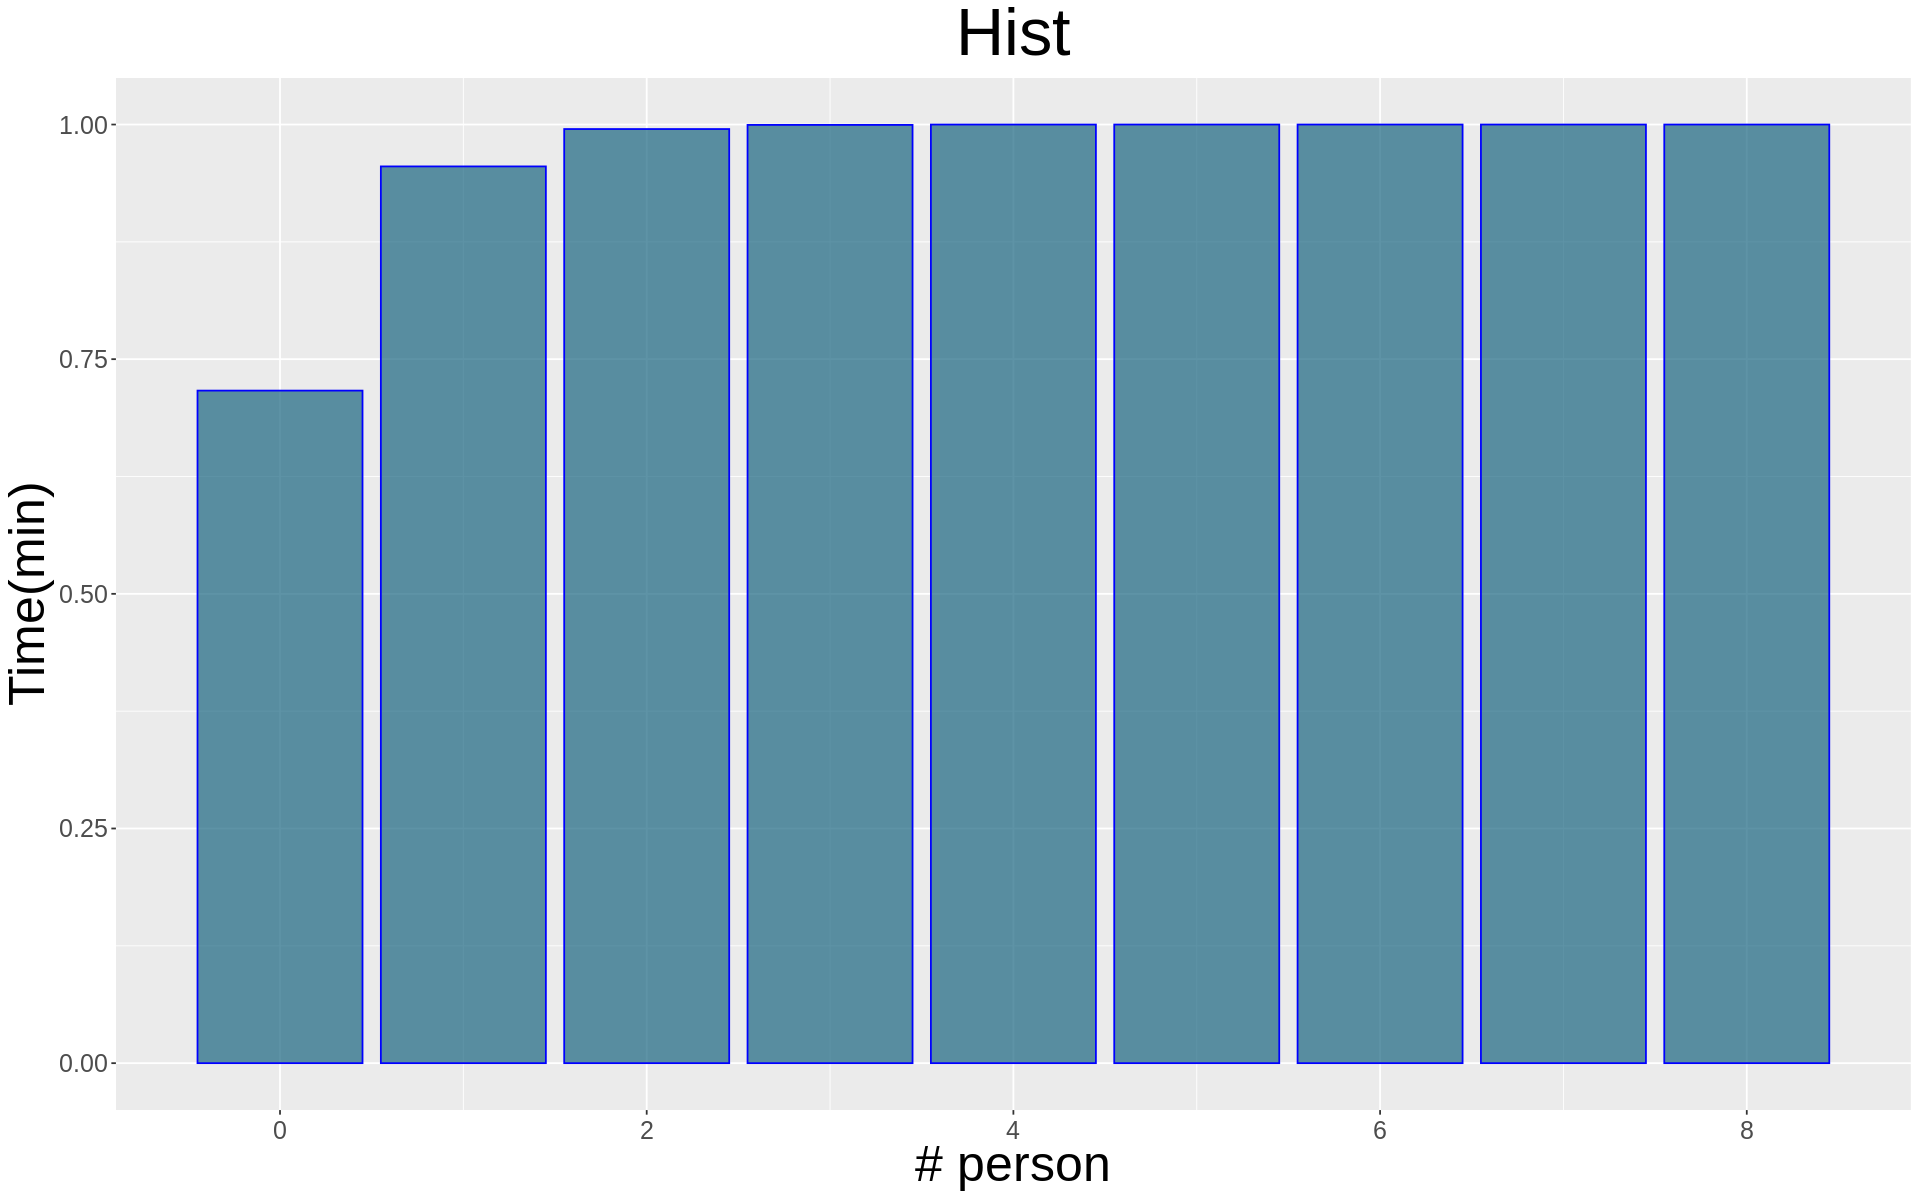

In [6]:
options(repr.plot.width = 16, repr.plot.height = 10)


df = tibble(Pages=x,Typos=ppois(x,lambda))
ggplot(df, aes(x=Pages, y=Typos)) + 
    ggtitle("Hist") +
    geom_bar(stat="identity", color="blue", fill=rgb(0.1,0.4,0.5,0.7)) + 
    labs(x="# person", y="Time(min)") +
    theme(axis.text.x = element_text(vjust = 0.5, hjust=0.5, size=15),
           axis.text.y = element_text(vjust = 0.5, hjust=0.5, size=15),
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30)
         )


print(paste0("The probability that there is at least one error on a specific page is:",(1-ppois(lambda = 1/3,1))*100, '%'))


## Exercise 4

In [7]:
ace_prob <- 1-(48/52)^10
print(paste0("The probability that at least in 10 draws are needed is: ",ace_prob*100,"%"))

[1] "The probability that at least in 10 draws are needed is: 55.0862892858136%"


## Exercise 5

In [8]:
f1 <- function(t, c = 1){(t <= 1)*(0)+(1 < t & t < 2)*( c*(t-1)*(2-t))+(t>=2)*(0)}
I <- integrate(f1, lower = 1, upper = 2)
C <-  1 / I$value
print(paste0("Numerical C:6 Theoretical C= ",C))
f2 <- function(t, c = 6) c*(t-1)*(2-t)

[1] "Numerical C:6 Theoretical C= 6"


In [9]:
I1 <- integrate(f2, lower = 1.25, upper = 2)
I2 <- integrate(f2, lower = 1.5, upper = 2)
print(paste0("The probability that the student will finish the test in more then 75 min is " ,I1$value))
print(paste0("The probability of taking between 90 and 120 minutes is ", I2$value))

[1] "The probability that the student will finish the test in more then 75 min is 0.84375"
[1] "The probability of taking between 90 and 120 minutes is 0.5"


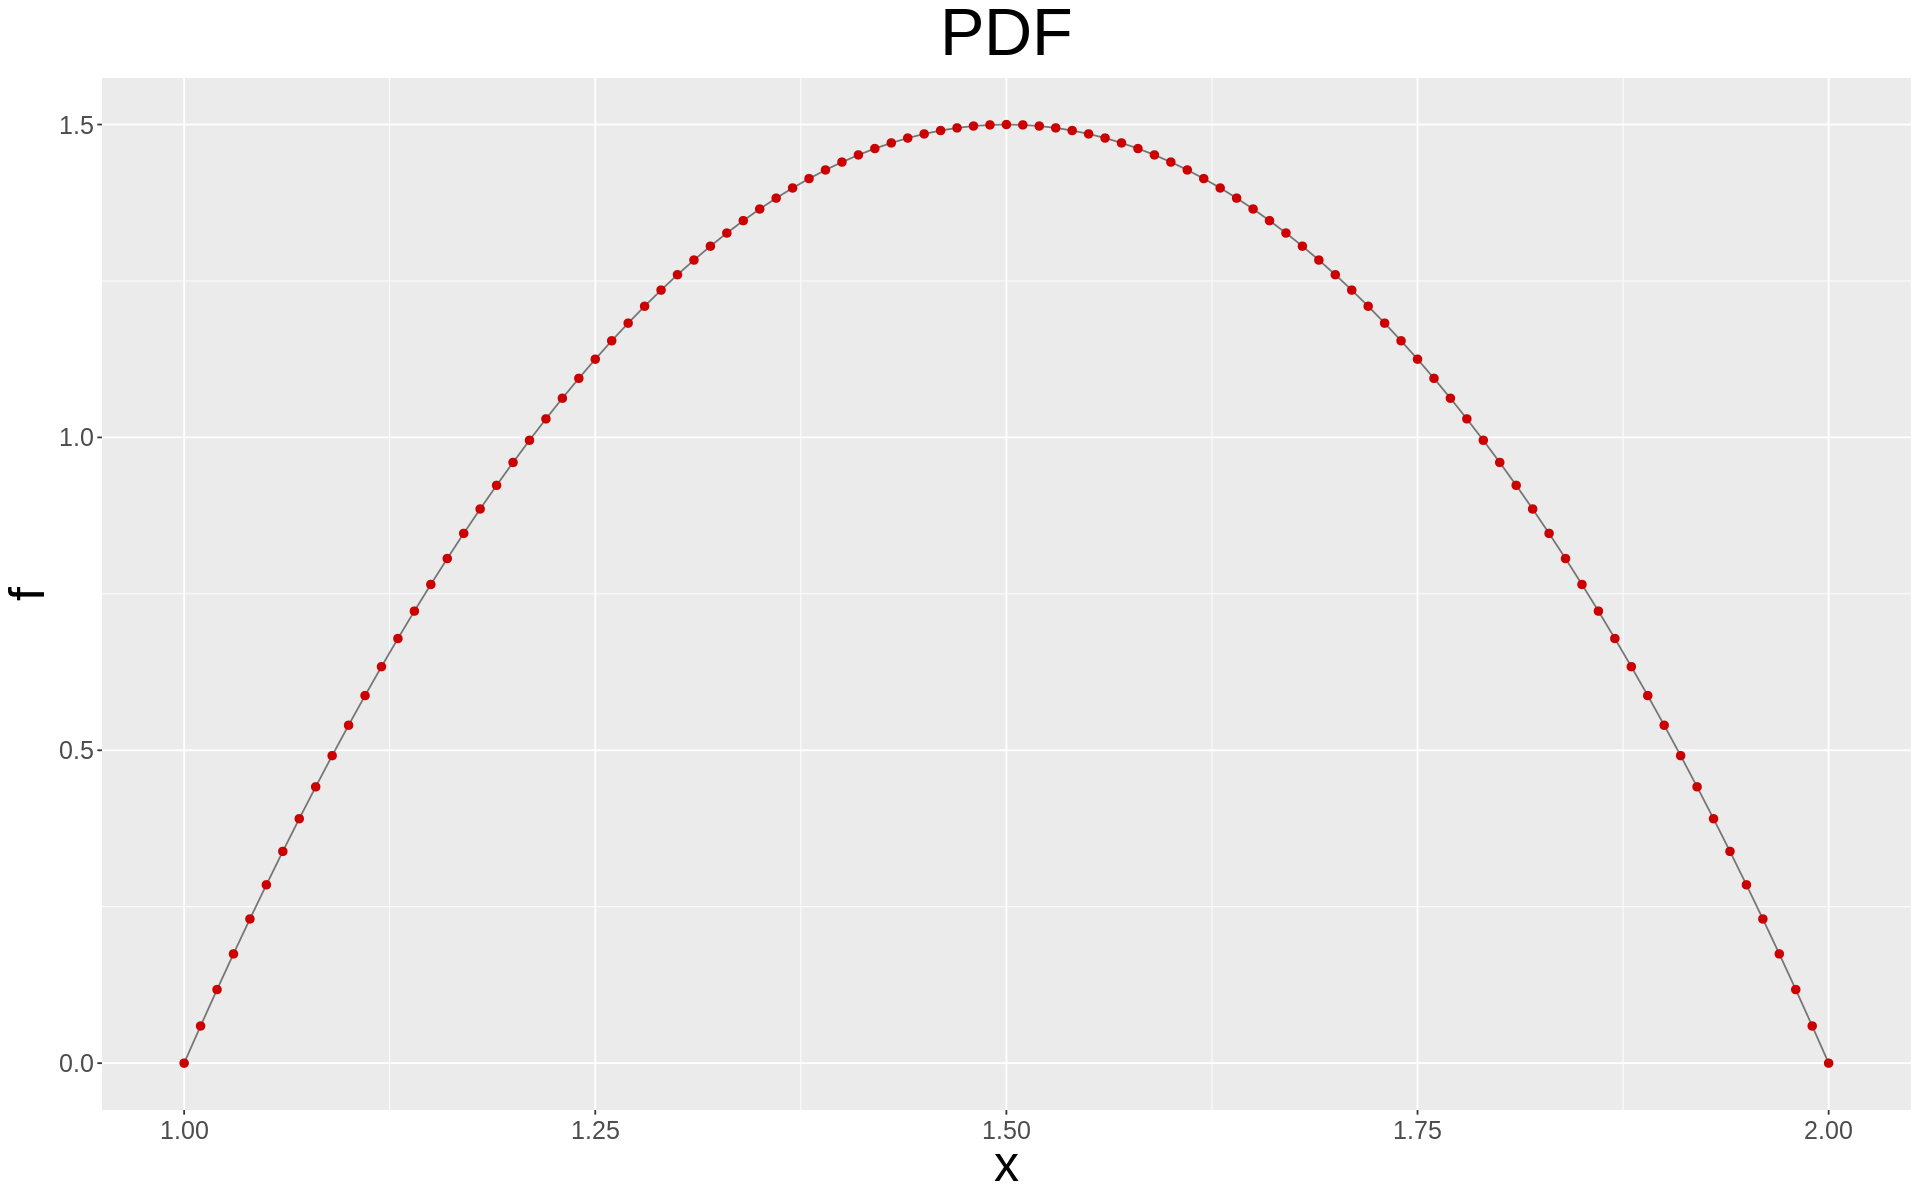

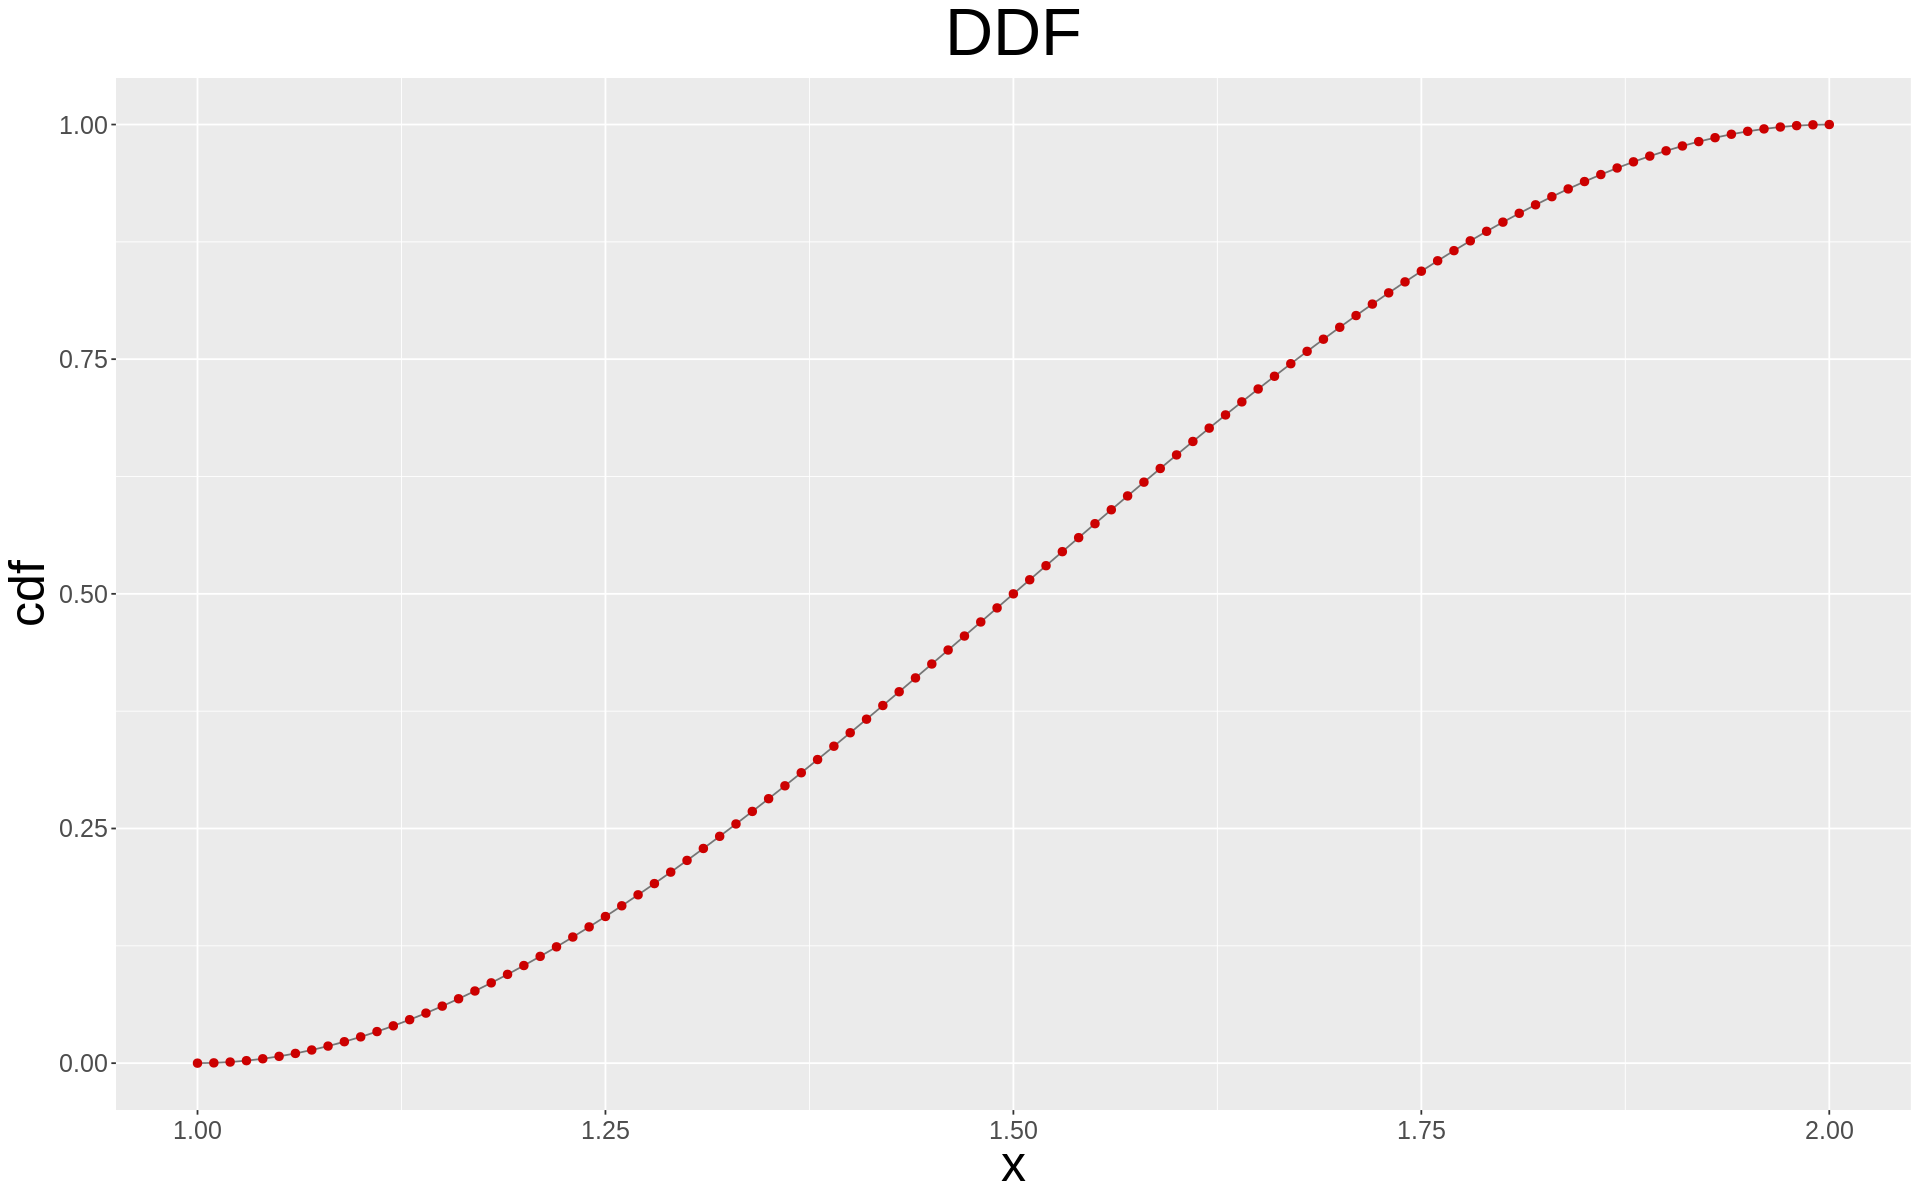

In [10]:
cdf <- function(x,c = 6) {
        ifelse(x > 1 & x < 2, 
              c * (3* (x^2)/2 - (x^3)/3 - 2*x) + 5,
               ifelse(x <= 1,
                     0,
                     1))
    }

qdf <- Vectorize(inverse(cdf,lower=1, upper=2))

rdf <- function(x){
    return (qdf(runif(x)))
}
x <- seq(1,2,0.01)
pr <- f2(x)
pdf_df <- data.frame(x = x, f = pr, cdf = cdf(x))
ggplot(pdf_df, aes(x,f))+ ggtitle("PDF")+
  geom_line( size=0.5,alpha = .5) +
  geom_point(color="#CC0000", size = 2) + theme(axis.text.x = element_text(vjust = 0.5, hjust=0.5, size=15),
           axis.text.y = element_text(vjust = 0.5, hjust=0.5, size=15),
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30))
ggplot(pdf_df, aes(x,cdf))+ ggtitle("DDF") +
  geom_line(size=0.5,alpha = .5) +
  geom_point(color="#CC0000", size = 2)   + theme(axis.text.x = element_text(vjust = 0.5, hjust=0.5, size=15),
           axis.text.y = element_text(vjust = 0.5, hjust=0.5, size=15),
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30)
         )

## Exercise 6

In [11]:
pdf <- function(x){(x <= 1)*(0)+(1 < x & x < 2)*(2/x^2)+(x>=2)*(0)}


cdf <- function(x){(x <= 1)*(0)+(1 < x & x < 2)*(2-2/x)+(x>=2)*(0)}

qdf<- Vectorize(inverse(cdf,lower=1, upper=2))

rdf <- function(x){
    return (qdf(runif(x)))
}

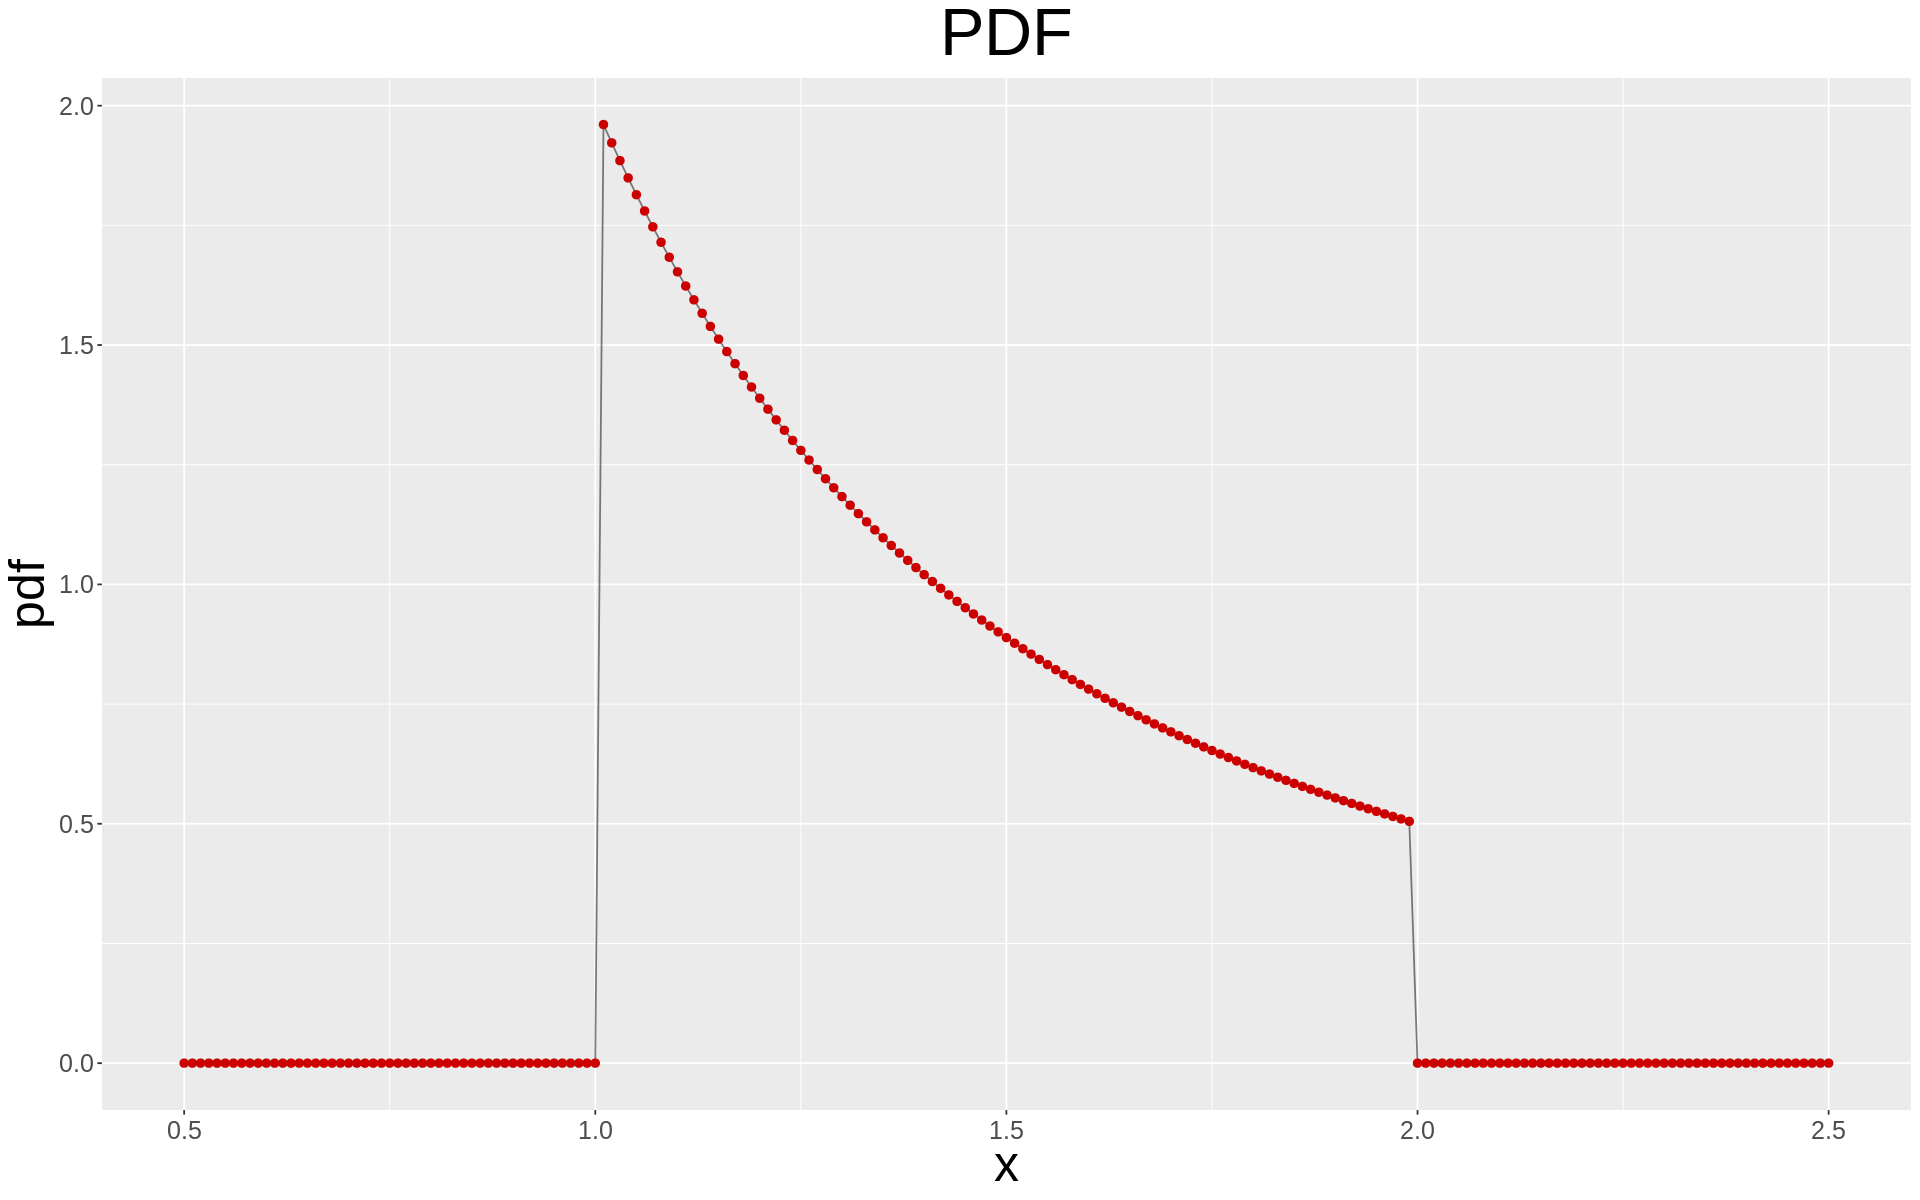

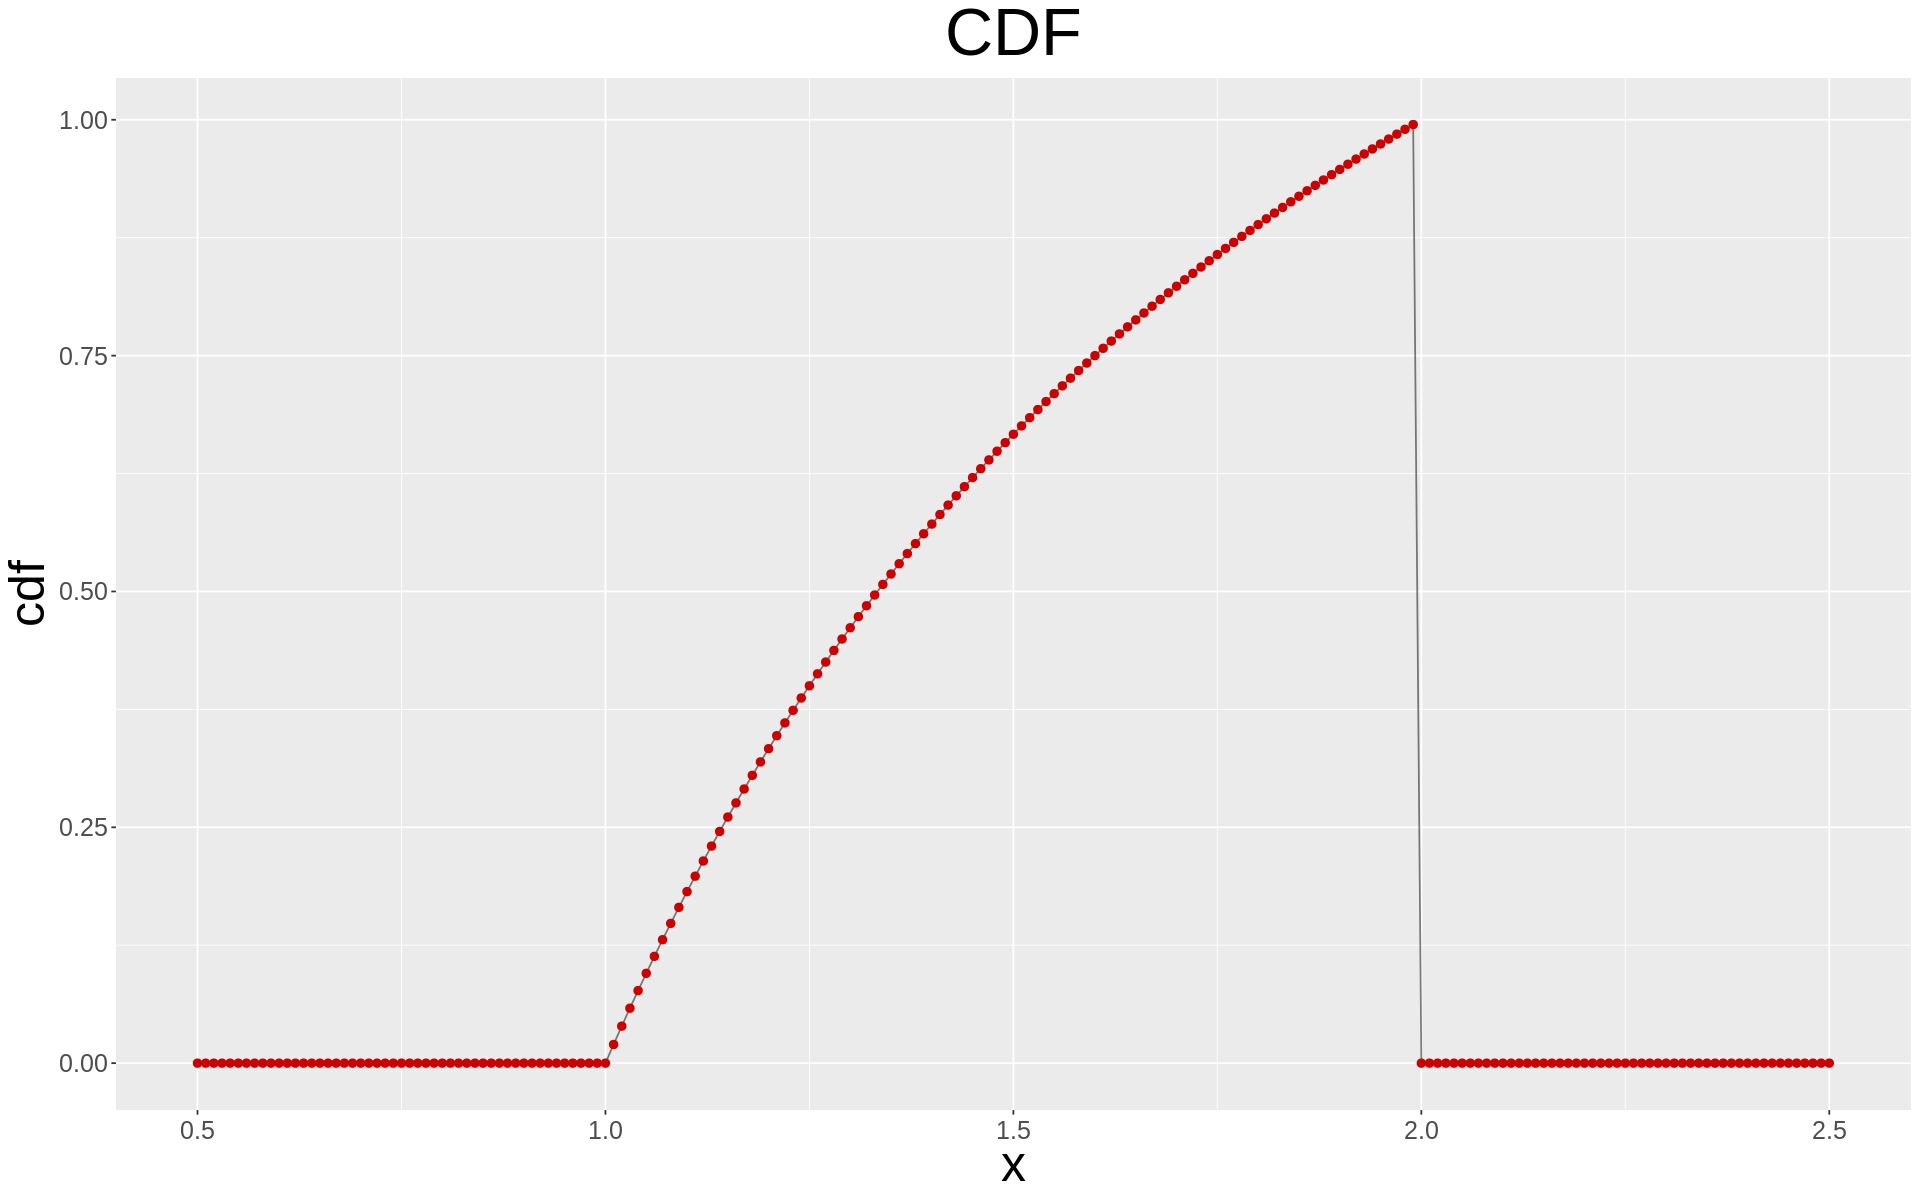

In [12]:
x <- seq(0.5,2.5,0.01)
pr <- pdf(x)
pdf_df <- tibble(x = x, pdf =  pdf(x), cdf = cdf(x))
ggplot(pdf_df, aes(x,pdf))+ 
  geom_line( size=0.5,alpha = .5) +
  geom_point(color="#CC0000", size = 2)+ggtitle("PDF") + theme(axis.text.x = element_text(vjust = 0.5, hjust=0.5, size=15),
           axis.text.y = element_text(vjust = 0.5, hjust=0.5, size=15),
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30)
         )
ggplot(pdf_df, aes(x,cdf))+ 
  geom_line( size=0.5,alpha = .5) +
  geom_point(color="#CC0000", size = 2)+ggtitle("CDF") + theme(axis.text.x = element_text(vjust = 0.5, hjust=0.5, size=15),
           axis.text.y = element_text(vjust = 0.5, hjust=0.5, size=15),
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30)
         )

In [13]:
print(paste0('The probability that the tires last <= than 15000 km is ', cdf(1.5)))
s<-rdf(3000)
print(paste0("Mean value = ",mean(s)))
print(paste0("Variance = ",mean(s**2) - mean(s)**2))

[1] "The probability that the tires last <= than 15000 km is 0.666666666666667"
[1] "Mean value = 1.38407895081858"
[1] "Variance = 0.0782052424676156"
